In [9]:
import os
import shutil
import random

# Paths
dataset_path = "processed_dataset"
train_dir = "train_data"
val_dir = "val_data"
test_dir = "test_data"

# Create directories
for folder in [train_dir, val_dir, test_dir]:
    for category in ["Negative", "Positive"]:
        os.makedirs(os.path.join(folder, category), exist_ok=True)

# Function to split data
def stratified_split(source_dir, train_dest, val_dest, train_ratio=0.8):
    image_files = [f for f in os.listdir(source_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    # Shuffle images
    random.shuffle(image_files)
    
    total_images = len(image_files)
    train_split = int(total_images * train_ratio)

    for i, img_name in enumerate(image_files):
        src_path = os.path.join(source_dir, img_name)
        
        if i < train_split:
            dest_path = os.path.join(train_dest, img_name)
        else:
            dest_path = os.path.join(val_dest, img_name)

        shutil.copy(src_path, dest_path)

# Split Labelled Data (for Training/Validation)
stratified_split(
    os.path.join(dataset_path, "Positive", "Labelled"),
    os.path.join(train_dir, "Positive"),
    os.path.join(val_dir, "Positive")
)

# Split Negative Data (for Training/Validation)
stratified_split(
    os.path.join(dataset_path, "Negative"),
    os.path.join(train_dir, "Negative"),
    os.path.join(val_dir, "Negative")
)

# Move Unlabelled Data to Testing Only (No Split)
test_positive_path = os.path.join(dataset_path, "Positive", "Unlabelled")
test_negative_path = os.path.join(dataset_path, "Negative")  # Also test on normal cells

for img_name in os.listdir(test_positive_path):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        shutil.copy(os.path.join(test_positive_path, img_name), os.path.join(test_dir, "Positive"))

for img_name in os.listdir(test_negative_path):
    if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        shutil.copy(os.path.join(test_negative_path, img_name), os.path.join(test_dir, "Negative"))

print("✅ Data split complete! Labelled data is for training, Unlabelled is for testing.")


✅ Data split complete! Labelled data is for training, Unlabelled is for testing.


📌 Training Set Samples:


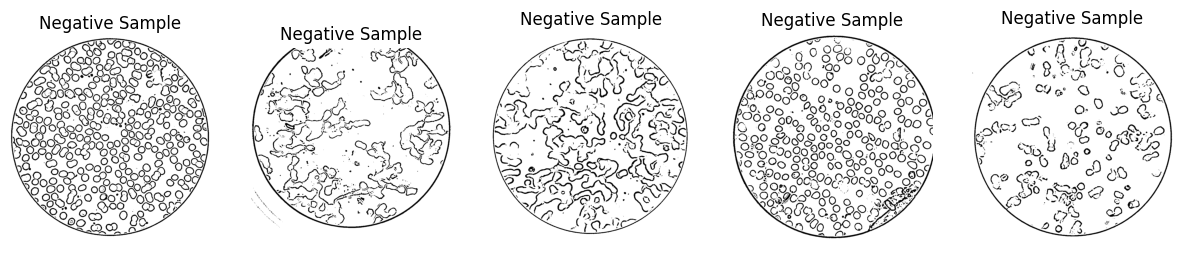

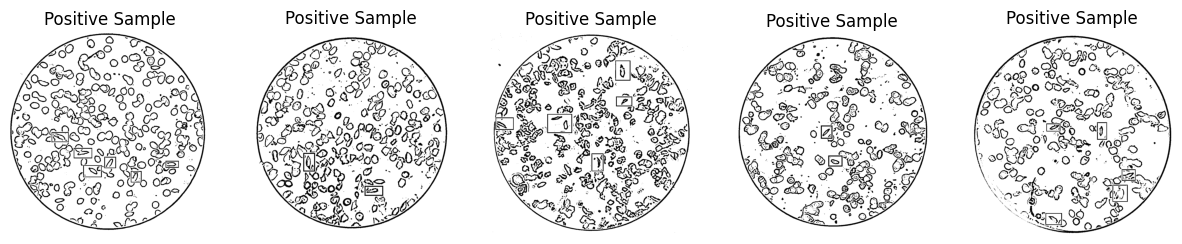

📌 Validation Set Samples:


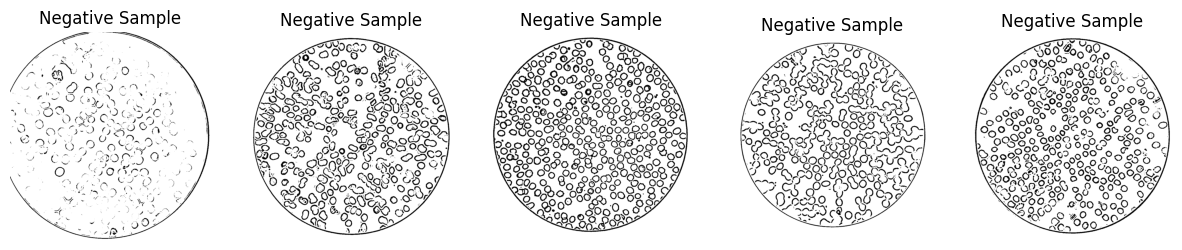

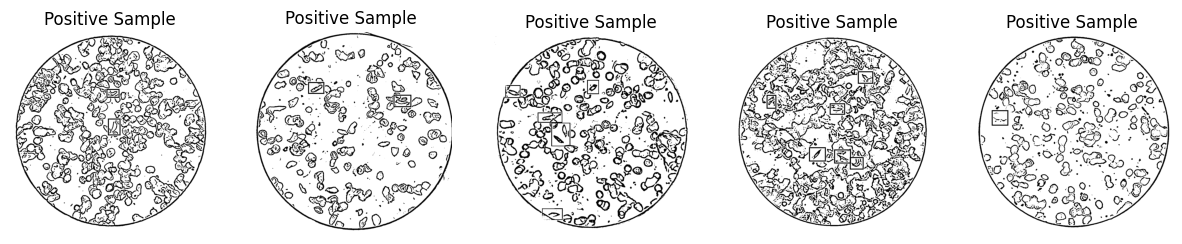

📌 Test Set Samples:


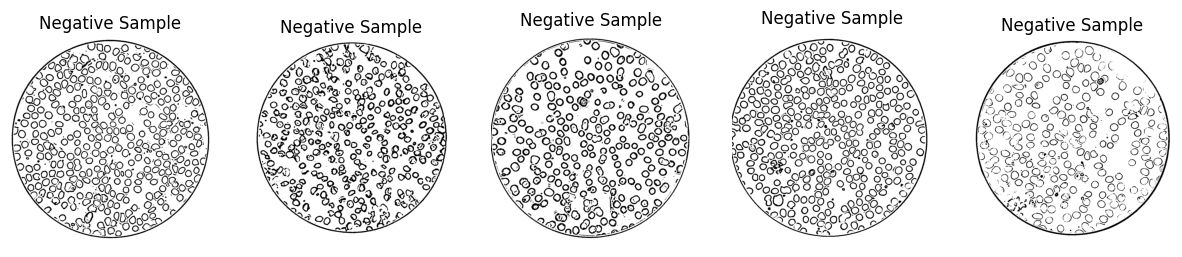

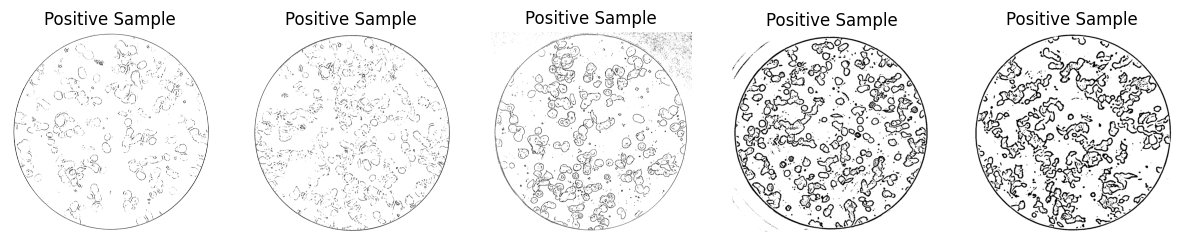

In [10]:
import matplotlib.pyplot as plt
import random

# Function to display images from each dataset split
def visualize_dataset(dataset_dir, category, num_images=5):
    category_path = os.path.join(dataset_dir, category)
    image_files = os.listdir(category_path)
    
    if len(image_files) == 0:
        print(f"No images found in {category_path}")
        return
    
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(15, 5))
    
    for i, img_name in enumerate(selected_images):
        img_path = os.path.join(category_path, img_name)
        img = plt.imread(img_path)
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"{category} Sample")
        plt.axis("off")

    plt.show()

# Show some samples from each dataset
print("📌 Training Set Samples:")
visualize_dataset(train_dir, "Negative")
visualize_dataset(train_dir, "Positive")

print("📌 Validation Set Samples:")
visualize_dataset(val_dir, "Negative")
visualize_dataset(val_dir, "Positive")

print("📌 Test Set Samples:")
visualize_dataset(test_dir, "Negative")
visualize_dataset(test_dir, "Positive")
